In [2]:
import numpy as np
import re

# Adding resolution calculators for SP2300 spectrographs

In [3]:
resolutions_SP2300 = {
    'pixis': {
        '150': [[10,20,25,50,100,150,200,300],
                [1.32,1.32,1.32,1.32,2.11,3.17,4.23,6.34]],
        '300': [[10,20,25,50,100,150,200,300],
                [0.648,0.648,0.648,0.648,1.04,1.56,2.08,3.12]],
    },
    'proem': {
        '150': [[10,20,25,50,100,150,200,300],
                [1.27,1.27,1.27,1.27,2.11,3.17,4.23,6.34]],
        '300': [[10,20,25,50,100,150,200,300],
                [0.623,0.623,0.623,0.623,1.039,1.56,2.08,3.12]],
    },
    'pionir': {
        '150': [[10,20,25,50,100,150,200,300],
                [1.27,1.27,1.27,1.27,2.11,3.17,4.23,6.34]],
        '300': [[10,20,25,50,100,150,200,300],
                [0.623,0.623,0.623,0.623,1.039,1.56,2.08,3.12]],
    },
}

def slit_to_resolution_SP2300(grating, slit_width, camera):
    grating_string = re.sub("[^0-9]", "", str(grating))
    if grating_string not in ['150','300']:
        print("Unavailable grating")
        return None
    camera = camera.lower()
    if 'pixis' in camera:
        camera = 'pixis'
    elif 'proem' in camera:
        camera = 'proem'
    elif 'pionir' in camera:
        camera = 'pionir'
    else:
        print("invalid camera choice")
        return None
    return np.interp(slit_width,resolutions_SP2300[camera][grating_string][0],resolutions_SP2300[camera][grating_string][1])

In [4]:
slit_to_resolution_SP2300('300',20,'pixis')

0.648

In [5]:
from matplotlib import pyplot as plt

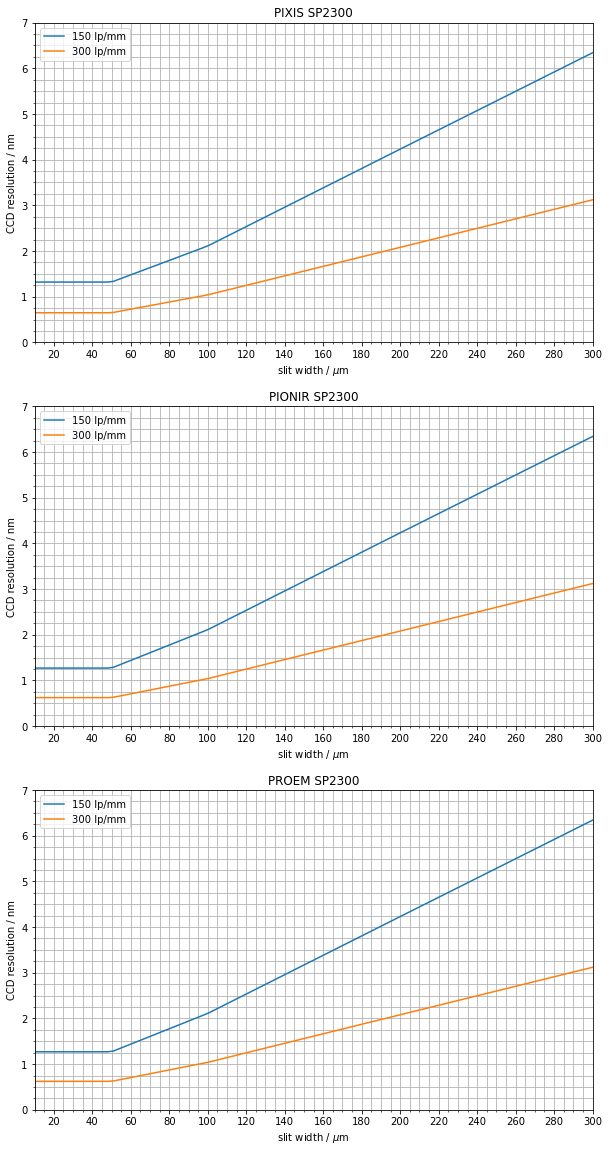

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,20))
slit_widths = np.linspace(10,300,100)
for idx, camera in enumerate('pixis pionir proem'.split(' ')):
    for grating in ['150','300']:
        resols = [slit_to_resolution_SP2300(grating, sw, camera) for sw in slit_widths]
        ax[idx].plot(slit_widths,resols,label='%s lp/mm' % grating)
    major_ticks = np.arange(0, 301, 20)
    minor_ticks = np.arange(0, 301, 5)
    ax[idx].set_xticks(major_ticks)
    ax[idx].set_xticks(minor_ticks, minor=True)
    major_ticks = np.arange(0, 11, 1)
    minor_ticks = np.arange(0, 11, 0.25)
    ax[idx].set_yticks(major_ticks)
    ax[idx].set_yticks(minor_ticks, minor=True)
    ax[idx].legend()
    ax[idx].set_title(camera.upper()+' SP2300')
    ax[idx].set_xlabel('slit width / $\mu$m')
    ax[idx].set_ylabel('CCD resolution / nm')
    ax[idx].set_xlim(10,300)
    ax[idx].grid(True, which = 'both')
    ax[idx].set_ylim(0,7)
plt.show()